In [65]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np

## Chandra NGC-1068

https://heasarc.gsfc.nasa.gov/FTP/chandra/data/byobsid/8//11358/


In [26]:
with fits.open("data/ngc1068-chandra.fits") as hdu_list:
    print(hdu_list.info())
    
    events = Table.read(hdu_list, hdu=1)
    print(events.columns)


Filename: data/ngc1068-chandra.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      34   ()      
  1  EVENTS        1 BinTableHDU   1064   39933R x 20C   [1D, 1J, 1I, 1I, 1I, 1I, 1I, 1I, 1E, 1E, 1E, 1E, 25I, 1J, 1J, 1E, 1J, 1I, 1I, 32X]   
  2  GTI           7 BinTableHDU     28   1R x 2C   [1D, 1D]   
  3  GTI           4 BinTableHDU     28   1R x 2C   [1D, 1D]   
  4  GTI           5 BinTableHDU     28   1R x 2C   [1D, 1D]   
  5  GTI           6 BinTableHDU     28   1R x 2C   [1D, 1D]   
  6  GTI           8 BinTableHDU     28   2R x 2C   [1D, 1D]   
  7  GTI           9 BinTableHDU     28   1R x 2C   [1D, 1D]   


None
<TableColumns names=('time','expno','ccd_id','node_id','chipx','chipy','tdetx','tdety','detx','dety','x','y','phas','pha','pha_ro','energy','pi','fltgrade','grade','status')>


In [66]:
# Add RA and DEC
ra = np.arctan2(events['tdetx'], events['tdety']) * (180.0 / np.pi)
dec = np.arctan2(events['tdety'], np.sqrt(events['tdetx']**2 + events['tdety']**2)) * (180.0 / np.pi)

events['ra'] = ra
events['dec'] = ra

print(events.columns)

<TableColumns names=('time','expno','ccd_id','node_id','chipx','chipy','tdetx','tdety','detx','dety','x','y','phas','pha','pha_ro','energy','pi','fltgrade','grade','status','ra','dec')>


/tmp/ipykernel_8980/2044880199.py:3: RuntimeWarning: invalid value encountered in sqrt
  dec = np.arctan2(events['tdety'], np.sqrt(events['tdetx']**2 + events['tdety']**2)) * (180.0 / np.pi)


{4, 5, 6, 7, 8, 9}


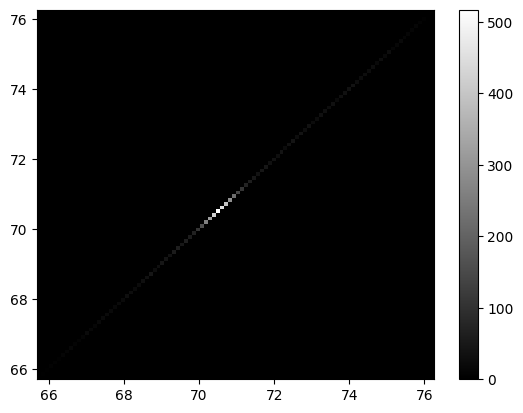

In [68]:
mask = events['ccd_id'] == 9

print(set([c for c in events['ccd_id']]))

events_filtered = events[mask]

ra, dec = events_filtered['ra'], events_filtered['dec']
plt.hist2d(ra, dec, bins=(100, 100), cmap='gray')
#x, y = events_filtered['x'], events_filtered['y']
#plt.hist2d(x, y, bins=(100, 100), cmap='gray')
plt.colorbar()
plt.show()

In [30]:
print(events['tdetx'])

tdetx
 pix 
-----
 1738
  878
 4720
 4618
 4138
 4154
 4643
 3923
 4710
 4745
  ...
 2472
 2284
 2538
 2234
 2453
 2146
 2362
 2804
 1908
 2094
Length = 39933 rows


## MUSE NGC-1068
MUSE - WALCHER, C.J.